In [1024]:
import numpy as np
import pandas as pd

In [1025]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [1026]:
def medal_type(row):
    if row['gold'] > 0:
        return 3
    elif row['silver'] > 0:
        return 2
    elif row['bronze'] > 0:
        return 1
    else:
        return 0

data['medal'] = data.apply(medal_type, axis=1)

In [1027]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,medal
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,0


In [1028]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
 11  medal        11538 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


In [1029]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
 11  medal        10858 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


In [1030]:
data_target = data[['medal']].values.ravel()
data_target

array([0, 0, 1, ..., 0, 0, 0])

In [1031]:
data.drop(columns=['id', 'name', 'dob', 'gold', 'silver', 'bronze', 'medal'], inplace=True)

In [1032]:
df = pd.get_dummies(data, drop_first=True)
df.columns

Index(['height', 'weight', 'nationality_ALB', 'nationality_ALG',
       'nationality_AND', 'nationality_ANG', 'nationality_ANT',
       'nationality_ARG', 'nationality_ARM', 'nationality_ARU',
       ...
       'sport_rugby sevens', 'sport_sailing', 'sport_shooting',
       'sport_table tennis', 'sport_taekwondo', 'sport_tennis',
       'sport_triathlon', 'sport_volleyball', 'sport_weightlifting',
       'sport_wrestling'],
      dtype='object', length=228)

In [1033]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
df[['height', 'weight']] = scaler.fit_transform(df[['height', 'weight']])
df

,height,weight,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,-0.415029,-0.499388,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.768680,-0.994388,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.883697,0.428737,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.557509,0.490612,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.380684,-0.066263,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,-1.122330,-0.870638,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11534,-0.326617,-0.561263,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11535,0.734334,1.728112,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11536,-1.475980,-0.994388,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


array([[<Axes: title={'center': '0'}>]], dtype=object)

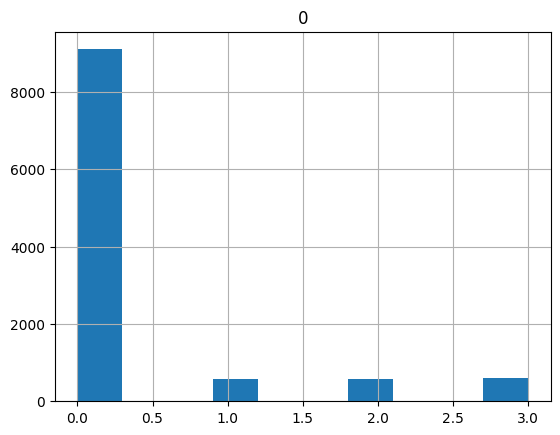

In [1034]:
pd.DataFrame(data_target).hist()

In [1035]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, data_target, test_size=0.4)

In [1036]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6514, 228), (4344, 228), (6514,), (4344,))

In [1037]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8390883977900553

In [1038]:
pred = model.predict(X_test)
predictions = model.predict_proba(X_test)
dfx = pd.DataFrame({'pred': pred, 'y_test': y_test})
dfx['medal no'] = predictions[:,0]
dfx['medal bronze'] = predictions[:,1]
dfx['medal silver'] = predictions[:,2]
dfx['medal gold'] = predictions[:,3]
# (dfx[dfx['pred'] != dfx['y_test']])[dfx['pred'] != 0]
dfx

,pred,y_test,medal no,medal bronze,medal silver,medal gold
0,0,0,0.538254,0.210436,0.117396,0.133914
1,0,0,0.630343,0.140046,0.055659,0.173952
2,0,0,0.629171,0.081785,0.079361,0.209683
3,0,1,0.754168,0.139061,0.038340,0.068431
4,0,0,0.945887,0.026930,0.008592,0.018590
...,...,...,...,...,...,...
4339,0,0,0.694071,0.109504,0.170744,0.025681
4340,0,0,0.880079,0.040037,0.055603,0.024282
4341,0,0,0.929609,0.022311,0.024360,0.023721
4342,0,0,0.869954,0.033749,0.056504,0.039793


In [1039]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

yx = label_binarize(y_test, classes=[0, 1, 2, 3]) # уххх :)
yx.shape

(4344, 4)

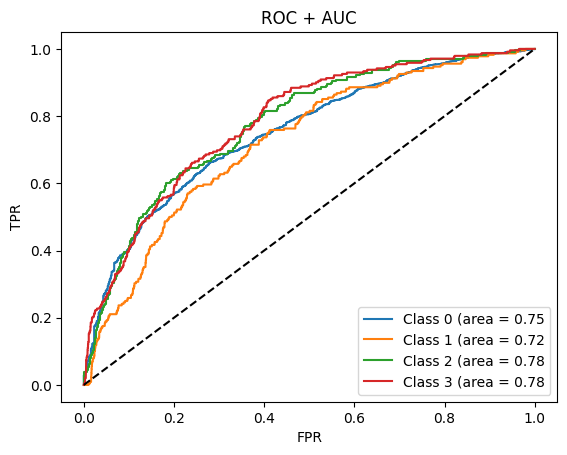

In [1040]:
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(yx[:, i], predictions[:, i])
    roc_auc[i] = roc_auc_score(yx[:, i], predictions[:, i])

plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC + AUC')
plt.legend()
plt.show()


Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.  

In [1041]:
stacked_data = np.hstack((predictions, yx))
dfx = pd.DataFrame(stacked_data)
dfx[(dfx[1] > 0.5) | (dfx[2] > 0.5) | (dfx[3] > 0.5)]

,0,1,2,3,4,5,6,7


In [1042]:
res_classes = {}
for i in range(4):
    res_classes[i] = []
    for step in range(0, 100):
        tp = 0  # True positive
        fp = 0  # False positive
        fn = 0  # False negative
        tn = 0  # True negative
        for predicted_prob, actual in zip(predictions[:, i], yx[:, i]):
            if predicted_prob >= step / 100:
                predicted = 1
            else:
                predicted = 0

            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
        res_classes[i].append((tp, fp, fn, tn))

for currecnt_class in res_classes:
    for tp, fp, fn, tn in res_classes[currecnt_class]:
        try:
            precision = tp / (tp + fp)
        except ZeroDivisionError:
            precision = 0
        recall = tp / (tp + fn)
        FPR = fp / (fp + tn)
        TPR = tp / (tp + fn)
        print(tp, fp, fn, tn, (tp + tn) / (tp + fp + fn + tn), precision, recall, FPR, TPR)
    print()


3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 1.0 1.0
3646 698 0 0 0.8393186003683242 0.8393186003683242 1.0 

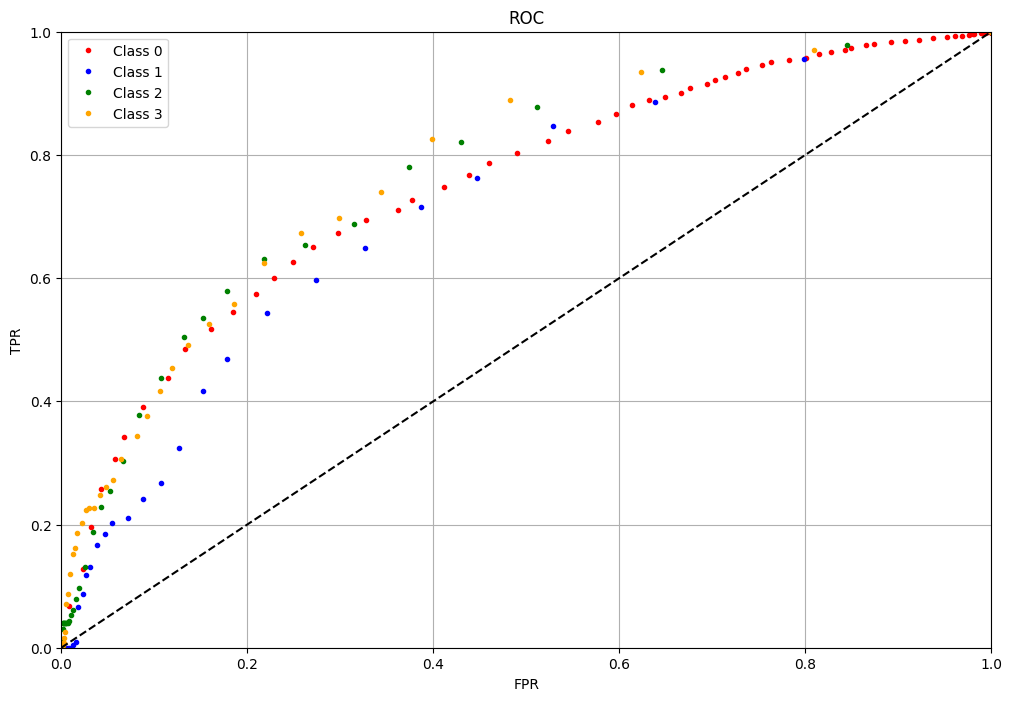

In [1046]:
plt.figure(figsize=(12, 8))
colors = ["red", "blue", "green", "orange"]

for i in range(4):
    for l in res_classes[i]:
        tp, fp, fn, tn = l
        FPR = fp / (fp + tn)
        TPR = tp / (tp + fn)
        plt.plot(FPR, TPR, '.', color=colors[i], label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()